In [85]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy
from importlib import reload
import model
import sparsemodel
reload(model)
reload(sparsemodel)

<module 'sparsemodel' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Sommer25\\Lieb-Lattice\\sparsemodel.py'>

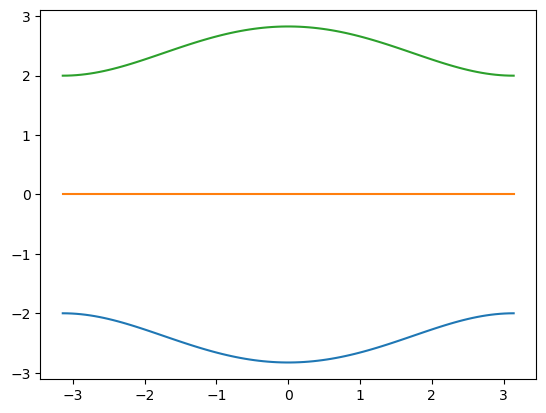

In [86]:
# Calculating energies along k-path using k-space model

myModel = model.Model()
H = myModel.Hamiltonian()
k = np.linspace(-np.pi, np.pi, 100)
energies = np.array([np.linalg.eigvalsh(H(k_i, 0)) for k_i in k])
plt.plot(k, energies)

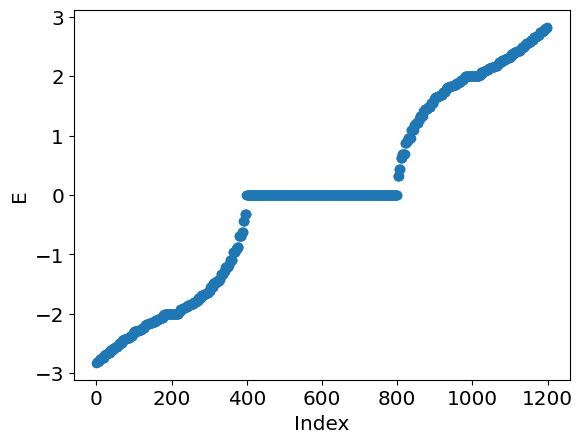

In [87]:
# Calculating energies along k-path using k-space model

mySparseModel = sparsemodel.SparseModel(nx=20, ny=20, bcx=True, bcy=True)
sH = mySparseModel.sparseHamiltonian()

# No dispersion for now, so compute dense Hamiltonian
dH = sH.toarray()

#fig, axes = plt.subplots(1, 1, figsize=(12, 6))
#axes[0].imshow(dH) # Visualize the Hamiltonian matrix
#axes[0].
plt.xlabel("Index", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')

plt.plot(np.linalg.eigvalsh(dH), 'o') # Visualize energies

#axes[0].set_xlabel('Index')
#axes[0].set_ylabel('')
#axes[0].set_xlabel('Index')
#axes[0].set_ylabel('Energy')

plt.savefig("Pictures/realSpHam.png")
plt.show()
# Sparse eigenvalue problem
vals, vecs = scipy.sparse.linalg.eigsh(sH, k=5, which='LM')  # SM = Smallest Magnitude

In [88]:
# Sparse eigenvalue problem
vals, vecs = scipy.sparse.linalg.eigsh(dH, k=10, which='LM')  # SM = Smallest Magnitude

In [89]:
mySparseModel.Es()

array([-2.82842712, -2.81106973, -2.81106973, ...,  2.81106973,
        2.81106973,  2.82842712])

In [90]:
np.where(dH[151]==-1.0)

(array([ 90, 149, 150, 152], dtype=int64),)

In [91]:
mySparseModel._indexList[(5,9,2)]

329

In [92]:
a = np.linalg.eigvalsh(dH)==mySparseModel.Es()

In [93]:
mySparseModel._indexList[(1,0,1)]

61

In [94]:
mySparseModel._indexList[(0,0,0)]
a[[20, 21]]=False

In [95]:
for i in a:
    if i ==False:
        print('problem')

problem
problem


In [96]:
Earr = np.linspace(-4,4,100)
DOS1 = mySparseModel.DOS(Earr, 0.1)

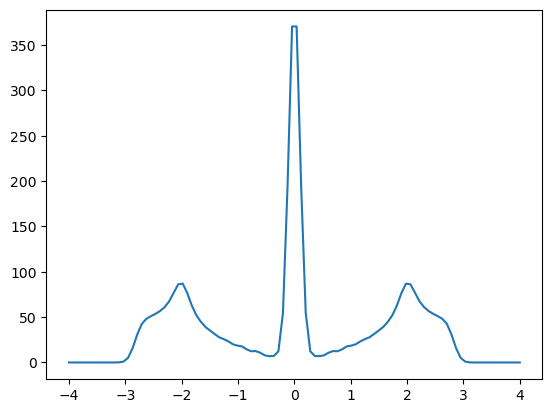

In [97]:
plt.plot(Earr, DOS1)
plt.show()

In [98]:
k = np.linspace(-np.pi, np.pi, 5)
mSM1 = sparsemodel.SparseModel(nx=20, ny=20, bcx=False, bcy=False)
mSM2 = sparsemodel.SparseModel(nx=5, ny=5, bcx=True, bcy=True)
mSMAD =  sparsemodel.SparseModel(nx=20, ny=20, bcx=False, bcy=False, AD=0.3)

sH1 = mSM1.sparseHamiltonian()
sH2 = mSM2.sparseHamiltonian()
sHAD = mSMAD.sparseHamiltonian()

# No dispersion for now, so compute dense Hamiltonian
dH1 = sH1.toarray()
dH2 = sH2.toarray()
dHAD = sHAD.toarray()

In [99]:
dHAD

array([[ 0.27052125, -1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-1.        , -0.08624499, -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -1.        ,  0.23533089, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.21606588,
        -1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ..., -1.        ,
        -0.09263137, -1.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -1.        ,  0.28521336]])

In [100]:
DOS1 = mSM1.DOS(Earr, 0.1)
DOS2 = mSM2.DOS(Earr, 0.1)
DOS3 = myModel.DOS(Earr, k, 0.1)

c:\Users\atsch\Desktop\MasterVorlesungen\Sommer25\Lieb-Lattice\model.py:50: ComplexWarning: Casting complex values to real discards the imaginary part
  eig[i]=np.sort(e)


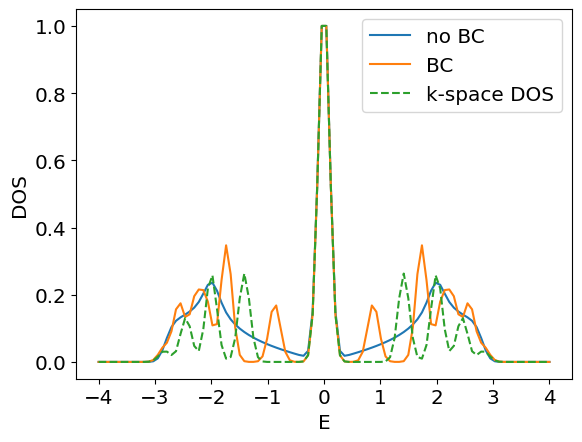

In [ ]:
plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')

plt.plot(Earr, DOS1/np.amax(DOS1), label='no BC')
plt.plot(Earr, DOS2/np.amax(DOS2), label='BC')
plt.plot(Earr, DOS3/np.amax(DOS3), linestyle='--',  label='k-space DOS')

plt.legend(fontsize='x-large')
plt.savefig("Pictures/DOS_fromRealSpace")
plt.show()

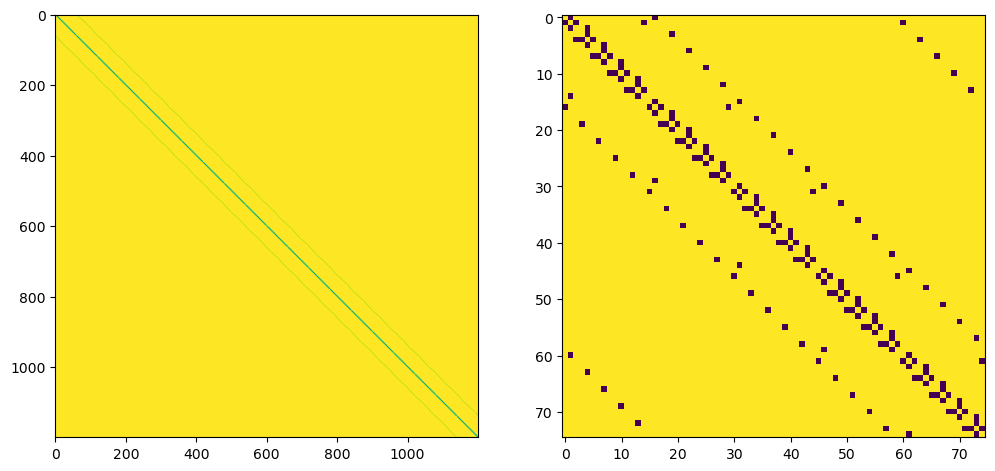

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(dH1) # Visualize the Hamiltonian matrix
axes[1].imshow(dH2)

plt.savefig("Pictures/realSpHam.png")
plt.show()

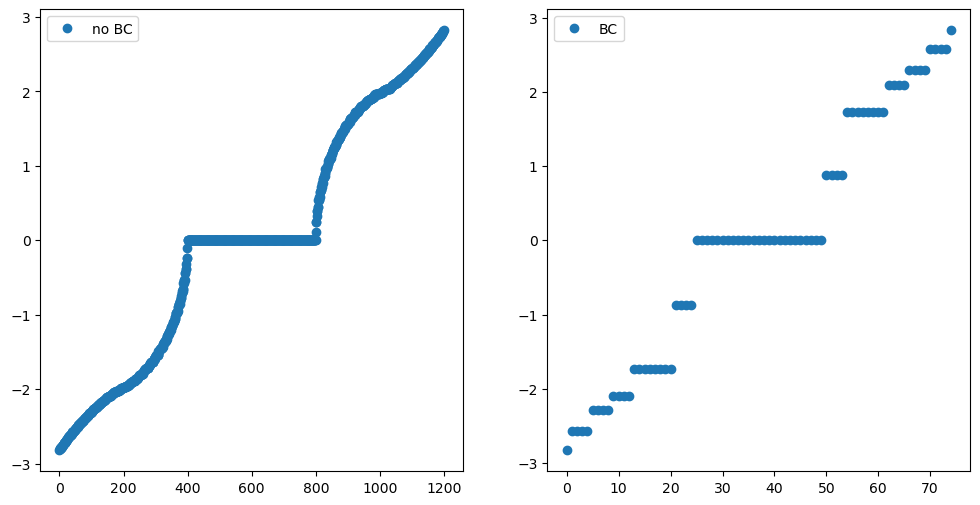

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].plot(np.linalg.eigvalsh(dH1), 'o', label='no BC') # Visualize energies # Visualize the Hamiltonian matrix
axes[1].plot(np.linalg.eigvalsh(dH2), 'o', label='BC') # Visualize energies

axes[0].legend()
axes[1].legend()

plt.savefig("Pictures/realSpHamE.png")
plt.show()

In [104]:
DOSAD = mSMAD.DOS(Earr, 0.06)


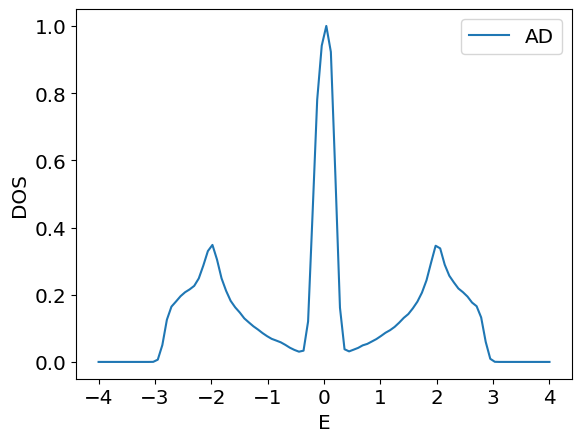

In [105]:
plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')

plt.plot(Earr, DOSAD/np.amax(DOSAD), label='AD')


plt.legend(fontsize='x-large')
plt.savefig("Pictures/DOS_AD")
plt.show()

In [106]:
mSMAD.t

1.0

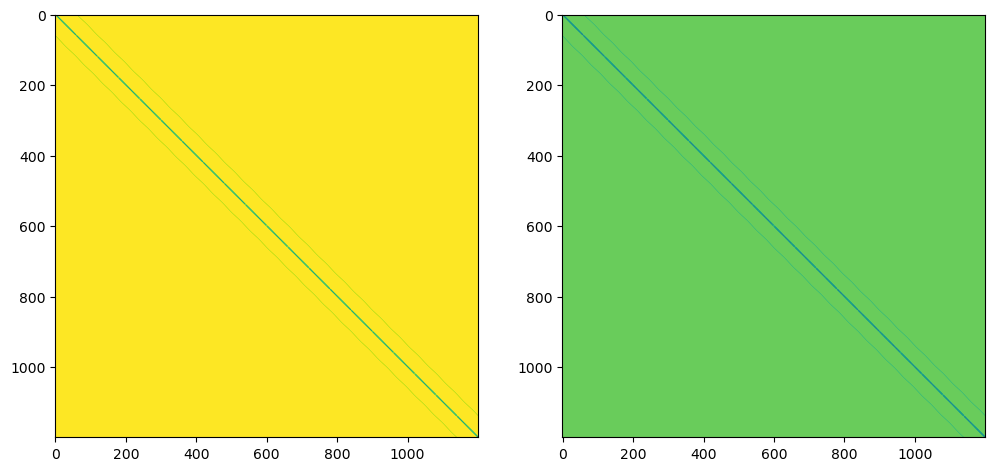

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(dH1) # Visualize the Hamiltonian matrix
axes[1].imshow(dHAD)

plt.savefig("Pictures/realSpHam.png")
plt.show()

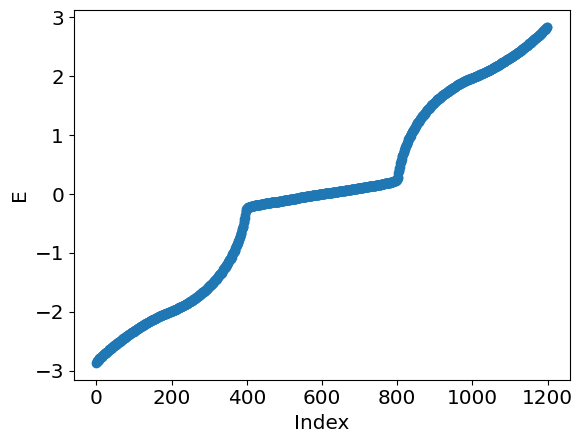

In [109]:
#fig, axes = plt.subplots(1, 2, figsize=(12, 6))
#axes[0].plot(np.linalg.eigvalsh(dH1), 'o', label='no BC') # Visualize energies # Visualize the Hamiltonian matrix
#axes[1].plot(np.linalg.eigvalsh(dHAD), 'o', label='AD') # Visualize energies

#axes[0].legend()
#axes[1].legend()
plt.xlabel("Index", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')

plt.plot(np.linalg.eigvalsh(dHAD), 'o', label='AD') # Visualize energies

plt.savefig("Pictures/AndersonDisorder.png")
plt.show()